# MATH 210 Introduction to Mathematical Computing

**March 14, 2025**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Numerical Methods

In [3]:
def odeEuler(f,t,y0):
    N = len(t) - 1
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] + f(t[n],y[n])*(t[n + 1] - t[n])
    return y
    
def odeHeun(f,t,y0):
    N = len(t) - 1
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        h = t[n + 1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n] + h,y[n] + k1*h)
        y[n + 1] = y[n] + (k1 + k2)/2*h
    return y

A numerical method has order $p$ if

$$
E(h) = | y(t_1) - y_1 | \leq Ch^{p+1}
$$

for any $y' = f(t,y)$, $y(t_0) =y_0$.

We can think of a method having order $p$ as the property that the method produces the first $p$ terms of the Taylor series of the solution $y(t)$ for any equation $y' = f(t,y)$.

Let's compute $E(h)$ for a simple differential equation and plot $\log h$ versus $E(h)$.

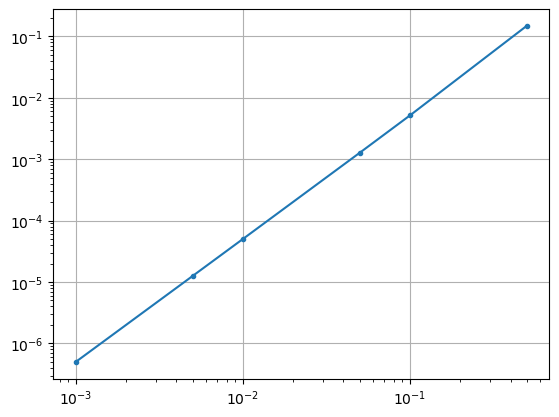

In [12]:
# y' = y , y(0) = 1 => y(t) = e^t
# t0 = 0, h = t1 - t0 = t1
f = lambda t,y: y
y0 = 1

h = [0.5,0.1,0.05,0.01,0.005,0.001]
E = np.zeros(len(h))
for n in range(len(h)):
    # Do one step of the method
    y = odeEuler(f,[0,h[n]],y0)
    # Compute E(h) = | y(h) - y1 |
    E[n] = np.abs( np.exp(h[n]) - y[1] )
    
plt.loglog(h,E,'.-'), plt.grid(True)
plt.show()

The $\log(h)$ versus $\log(E)$ plot for Euler's method has slope $2$ (for this equation).

Do the same for Heun's method.

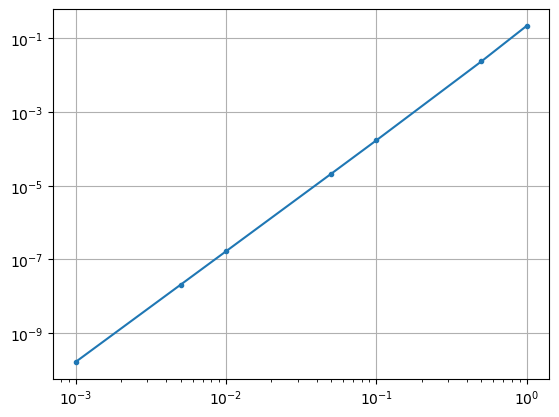

In [14]:
# y' = y , y(0) = 1 => y(t) = e^t
# t0 = 0, h = t1 - t0 = t1
f = lambda t,y: y
y0 = 1

h = [1,0.5,0.1,0.05,0.01,0.005,0.001]
E = np.zeros(len(h))
for n in range(len(h)):
    # Do one step of the method
    y = odeHeun(f,[0,h[n]],y0)
    # Compute E(h) = | y(h) - y1 |
    E[n] = np.abs( np.exp(h[n]) - y[1] )
    
plt.loglog(h,E,'.-'), plt.grid(True)
plt.show()

The $\log(h)$ versus $\log(E)$ plot for Heun's method has slope $3$ (for this equation).

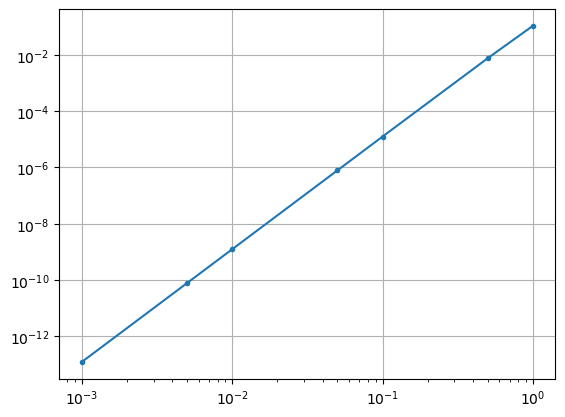

In [17]:
# y' = -ty , y(0) = 1 => y(t) = e^{-t^2/2}
# t0 = 0, h = t1 - t0 = t1
f = lambda t,y: -t*y
y0 = 1

h = [1,0.5,0.1,0.05,0.01,0.005,0.001]
E = np.zeros(len(h))
for n in range(len(h)):
    # Do one step of the method
    y = odeHeun(f,[0,h[n]],y0)
    # Compute E(h) = | y(h) - y1 |
    E[n] = np.abs( np.exp(-h[n]**2/2) - y[1] )
    
plt.loglog(h,E,'.-'), plt.grid(True)
plt.show()

The $\log(h)$ versus $\log(E)$ plot for Heun's method has slope $4$ for this equation! Why?

Notice that the Taylor series of $e^{-t^2/2}$ is

$$
e^{-t^2/2} = 1 - \frac{t^2}{2} + \frac{t^4}{8} + \cdots
$$